# Capstone Project: Food Demand Forecasting

## Import Modules and Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [6]:
train_df = pd.read_csv('data/train.csv')
center_info = pd.read_csv('data/fulfilment_center_info.csv')
meal_info = pd.read_csv('data/meal_info.csv')
test_df = pd.read_csv('data/test.csv')


## Inspect Data

### Numerical inspection and summaries

In [9]:
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [10]:
center_info

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [11]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [12]:
test_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0
...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0


**In addition to the train data, there are additional files with features related to the center and meal**
* *We will have to merge these*

#### Review/Explore the data in each of these dfs ####

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [16]:
center_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [17]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


* ***There are no null values in any of the dataframes***

### Check for duplicates

In [20]:
train_df.duplicated().sum()

0

In [21]:
center_info.duplicated().sum()

0

In [22]:
meal_info.duplicated().sum()

0

In [23]:
test_df.duplicated().sum()

0

***No duplicates found***

### Missing values

* ***There are no null values as seen in df info above***

* ***However, it is possible there are missing rows where there were no orders for a given week+center_id+meal_id combination***

In [27]:
num_centers = train_df.center_id.nunique()
num_centers

77

In [28]:
num_meals = train_df.meal_id.nunique()
num_meals

51

In [29]:
#Number of unique center-meal combos
center_meal_combos = num_centers * num_meals
center_meal_combos

3927

In [30]:
expected_rows_in_train = num_centers * num_meals * 145
expected_rows_in_train

569415

In [31]:
len(train_df)

456548

In [32]:
missing_rows = expected_rows_in_train - len(train_df)
missing_rows

112867

* ***Looks like the data does not have orders for all center-meal combos for all weeks***
* ***We assume those are weeks where there were no orders for that combo***

#### Convert week to datetime

In [35]:
train_df.week.nunique()

145

In [36]:
# The formula below starts the first week from Jan 1, 2020
train_df['Date'] = pd.to_datetime((train_df['week'] - 1) * 7 * 24 * 60 * 60 * 1000 + 1577836800000, unit='ms')
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date
0,1379560,1,55,1885,136.83,152.29,0,0,177,2020-01-01
1,1466964,1,55,1993,136.83,135.83,0,0,270,2020-01-01
2,1346989,1,55,2539,134.86,135.86,0,0,189,2020-01-01
3,1338232,1,55,2139,339.50,437.53,0,0,54,2020-01-01
4,1448490,1,55,2631,243.50,242.50,0,0,40,2020-01-01
...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,2022-10-05
456544,1062036,145,61,2304,482.09,482.09,0,0,42,2022-10-05
456545,1110849,145,61,2664,237.68,321.07,0,0,501,2022-10-05
456546,1147725,145,61,2569,243.50,313.34,0,0,729,2022-10-05


## EDA

### Numeric Values

**Change id columns to category type**

In [40]:
train_df[['id', 'center_id', 'meal_id']] = train_df[['id', 'center_id', 'meal_id']].astype('category')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     456548 non-null  category      
 1   week                   456548 non-null  int64         
 2   center_id              456548 non-null  category      
 3   meal_id                456548 non-null  category      
 4   checkout_price         456548 non-null  float64       
 5   base_price             456548 non-null  float64       
 6   emailer_for_promotion  456548 non-null  int64         
 7   homepage_featured      456548 non-null  int64         
 8   num_orders             456548 non-null  int64         
 9   Date                   456548 non-null  datetime64[ns]
dtypes: category(3), datetime64[ns](1), float64(2), int64(4)
memory usage: 46.6 MB


In [41]:
train_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date
0,1379560,1,55,1885,136.83,152.29,0,0,177,2020-01-01
1,1466964,1,55,1993,136.83,135.83,0,0,270,2020-01-01
2,1346989,1,55,2539,134.86,135.86,0,0,189,2020-01-01
3,1338232,1,55,2139,339.50,437.53,0,0,54,2020-01-01
4,1448490,1,55,2631,243.50,242.50,0,0,40,2020-01-01


### Analysis of the Datasets

### **`train` dataset**

In [44]:
train_df.describe()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date
count,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548
mean,74.768771,332.238933,354.156627,0.081152,0.10920,261.872760,2021-05-31 09:09:12.882938624
min,1.000000,2.970000,55.350000,0.000000,0.00000,13.000000,2020-01-01 00:00:00
25%,39.000000,228.950000,243.500000,0.000000,0.00000,54.000000,2020-09-23 00:00:00
50%,76.000000,296.820000,310.460000,0.000000,0.00000,136.000000,2021-06-09 00:00:00
75%,111.000000,445.230000,458.870000,0.000000,0.00000,324.000000,2022-02-09 00:00:00
max,145.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,2022-10-05 00:00:00
std,41.524956,152.939723,160.715914,0.273069,0.31189,395.922798,NaN


array([[<Axes: title={'center': 'checkout_price'}>,
        <Axes: title={'center': 'base_price'}>],
       [<Axes: title={'center': 'emailer_for_promotion'}>,
        <Axes: title={'center': 'homepage_featured'}>],
       [<Axes: title={'center': 'num_orders'}>, <Axes: >]], dtype=object)

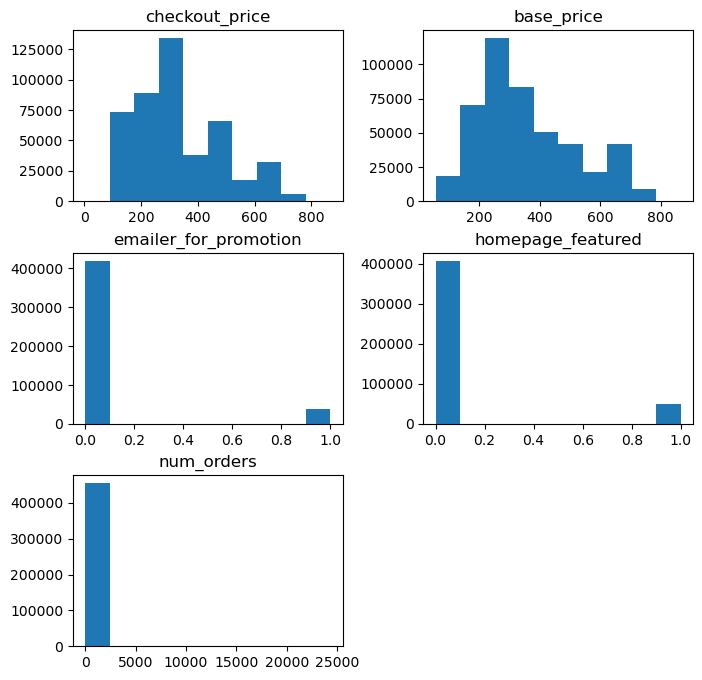

In [45]:
train_df.hist(['checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders'], figsize = (8, 8), grid = False)

* ***Target variable `num_orders` seems to have outliers. We'll expore it further below***

### **`center` dataset**

* ***Change the id and categorical columns from numeric to category type***

In [49]:
center_info[['center_id', 'city_code', 'region_code', 'center_type']] = center_info[['center_id', 'city_code', 'region_code', 'center_type']].astype('category')
center_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   center_id    77 non-null     category
 1   city_code    77 non-null     category
 2   region_code  77 non-null     category
 3   center_type  77 non-null     category
 4   op_area      77 non-null     float64 
dtypes: category(4), float64(1)
memory usage: 6.6 KB


In [50]:
center_info.describe()

,op_area
count,77.000000
mean,3.985714
std,1.106406
min,0.900000
25%,3.500000
50%,3.900000
75%,4.400000
max,7.000000


In [51]:
center_info.op_area.nunique()

30

array([[<Axes: title={'center': 'op_area'}>]], dtype=object)

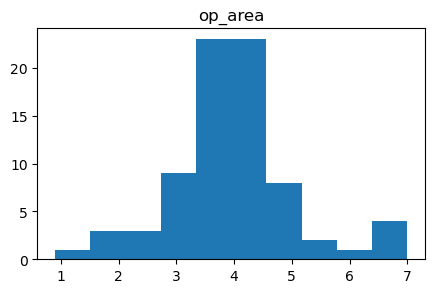

In [52]:
center_info.hist(figsize = (5, 3), grid = False)

* ***Higher number of centers seem to fall in `op_area` around 4.0***

In [54]:
center_catcols = ['city_code', 'region_code', 'center_type', 'op_area']

In [55]:
center_info.describe(include = ['object', 'category'])

,center_id,city_code,region_code,center_type
count,77,77,77,77
unique,77,51,8,3
top,10,590,56,TYPE_A
freq,1,9,30,43


[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


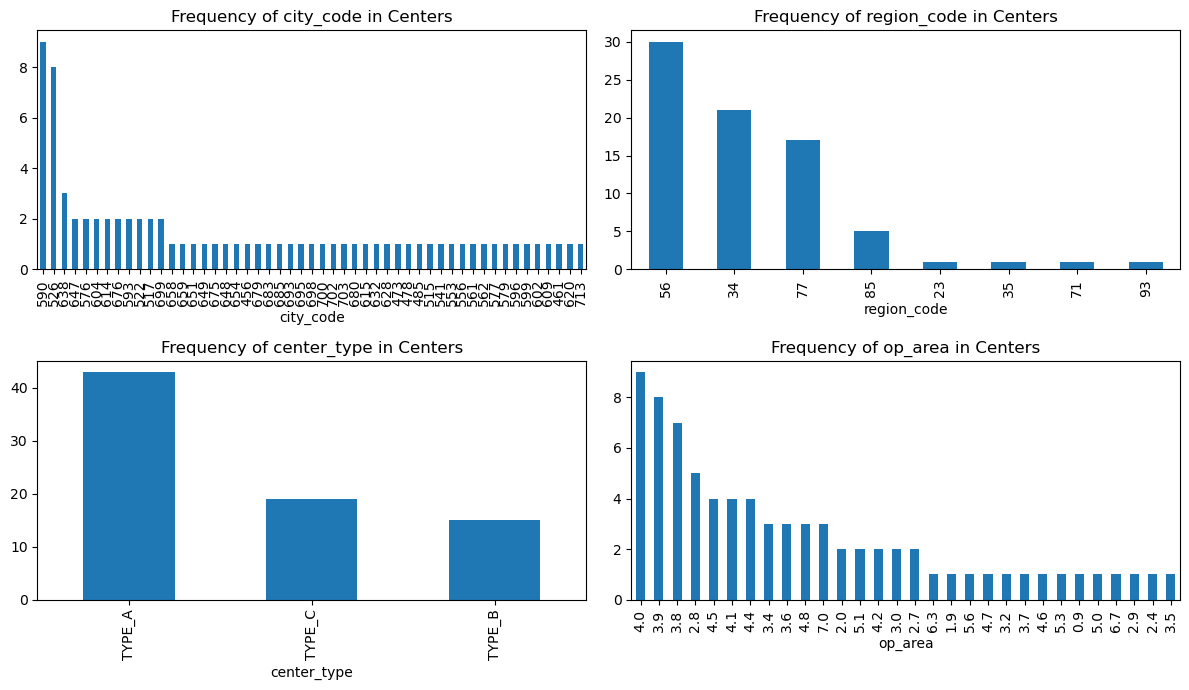

In [56]:
fig, axs = plt.subplots(nrows = 2, ncols=2, figsize=(12, 7))
print(axs)
for i, cat in enumerate(center_catcols):
    center_info[cat].value_counts().plot(kind = 'bar', title = f"Frequency of {cat} in Centers", ax = axs[i//2, i%2])

plt.tight_layout()
plt.show()

In [57]:
center_info.center_type.value_counts()

center_type
TYPE_A    43
TYPE_C    19
TYPE_B    15
Name: count, dtype: int64

In [58]:
center_info.center_type.value_counts(normalize=True)

center_type
TYPE_A    0.558442
TYPE_C    0.246753
TYPE_B    0.194805
Name: proportion, dtype: float64

In [59]:
center_info.op_area.value_counts(normalize=True)

op_area
4.0    0.116883
3.9    0.103896
3.8    0.090909
2.8    0.064935
4.5    0.051948
4.1    0.051948
4.4    0.051948
3.4    0.038961
3.6    0.038961
4.8    0.038961
7.0    0.038961
2.0    0.025974
5.1    0.025974
4.2    0.025974
3.0    0.025974
2.7    0.025974
6.3    0.012987
1.9    0.012987
5.6    0.012987
4.7    0.012987
3.2    0.012987
3.7    0.012987
4.6    0.012987
5.3    0.012987
0.9    0.012987
5.0    0.012987
6.7    0.012987
2.9    0.012987
2.4    0.012987
3.5    0.012987
Name: proportion, dtype: float64

In [60]:
center_info[center_catcols].nunique()

city_code      51
region_code     8
center_type     3
op_area        30
dtype: int64

In [61]:
for col in center_catcols:
    print(center_info[col].value_counts())

city_code
590    9
526    8
638    3
647    2
576    2
604    2
614    2
676    2
593    2
522    2
517    2
699    2
658    1
659    1
651    1
649    1
675    1
648    1
654    1
456    1
679    1
683    1
685    1
693    1
695    1
698    1
700    1
702    1
703    1
680    1
615    1
632    1
628    1
473    1
478    1
485    1
515    1
541    1
553    1
556    1
561    1
562    1
577    1
579    1
596    1
599    1
602    1
609    1
461    1
620    1
713    1
Name: count, dtype: int64
region_code
56    30
34    21
77    17
85     5
23     1
35     1
71     1
93     1
Name: count, dtype: int64
center_type
TYPE_A    43
TYPE_C    19
TYPE_B    15
Name: count, dtype: int64
op_area
4.0    9
3.9    8
3.8    7
2.8    5
4.5    4
4.1    4
4.4    4
3.4    3
3.6    3
4.8    3
7.0    3
2.0    2
5.1    2
4.2    2
3.0    2
2.7    2
6.3    1
1.9    1
5.6    1
4.7    1
3.2    1
3.7    1
4.6    1
5.3    1
0.9    1
5.0    1
6.7    1
2.9    1
2.4    1
3.5    1
Name: count, dtype: int64


In [62]:
center_info.region_code.value_counts(normalize=True)

region_code
56    0.389610
34    0.272727
77    0.220779
85    0.064935
23    0.012987
35    0.012987
71    0.012987
93    0.012987
Name: proportion, dtype: float64

* ***Majority (88\%) of the centers are in regions 56, 34, 77***
* ***56\% of the centers are TYPE_A***
* ***30\% of the centers have op_areas between 3.8 and 4.0***
* ***City codes 590 and 526 have highest number of centers, 9 and 8 resp**


### **`meal` dataset**

In [65]:
meal_info[['meal_id']] = meal_info[['meal_id']].astype('category')
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   meal_id   51 non-null     category
 1   category  51 non-null     object  
 2   cuisine   51 non-null     object  
dtypes: category(1), object(2)
memory usage: 3.4+ KB


***Categorical***

In [67]:
meal_info.describe(include = 'object')

,category,cuisine
count,51,51
unique,14,4
top,Beverages,Thai
freq,12,15


In [68]:
meal_info.category.value_counts()

category
Beverages       12
Extras           3
Soup             3
Other Snacks     3
Salad            3
Rice Bowl        3
Starters         3
Sandwich         3
Pasta            3
Desert           3
Biryani          3
Pizza            3
Fish             3
Seafood          3
Name: count, dtype: int64

In [69]:
meal_info.cuisine.value_counts()

cuisine
Thai           15
Indian         12
Italian        12
Continental    12
Name: count, dtype: int64

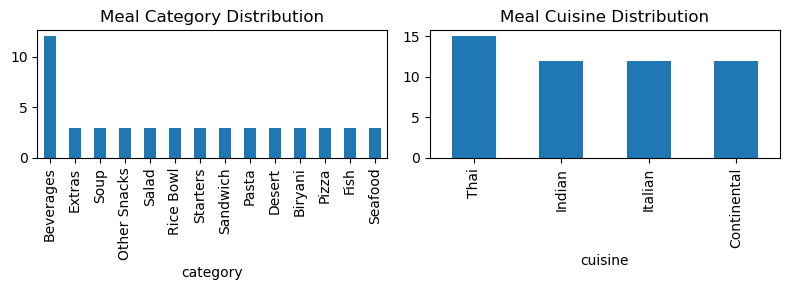

In [70]:
fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(8, 3))
meal_info['category'].value_counts().plot(kind = 'bar', title = f"Meal Category Distribution", ax = axs[0])
meal_info['cuisine'].value_counts().plot(kind = 'bar', title = f"Meal Cuisine Distribution", ax = axs[1])
plt.tight_layout()
plt.show()

* ***Beverages category is the most prominent type of meals (24% of all meal categories)***
* ***Cuisine type is almost evenly distributed in available meals, with Thai cuisine having about 25% more options***

### Dependent variable distribution

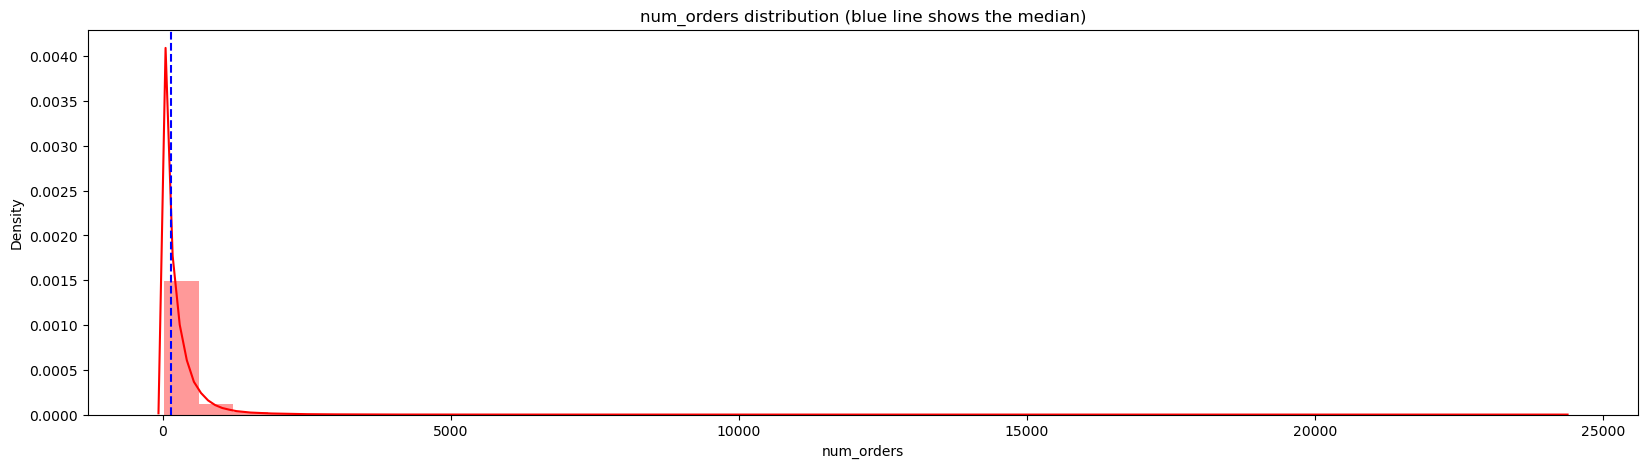

In [74]:
plt.figure(figsize=(20,5))
sns.distplot(train_df['num_orders'], bins=40, kde=True, color='red')
plt.title('num_orders distribution (blue line shows the median)')
plt.axvline(x=136, color='b', linestyle='--', label='Median')
plt.show()

* ***num_orders distribution is very right skewed***

In [76]:
train_df.query("num_orders > 15000")

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date
14050,1452474,5,43,2290,159.08,311.43,1,1,24299,2020-01-29
19700,1300512,7,43,2290,159.08,311.43,1,1,15336,2020-02-12


In [77]:
len(train_df.query("num_orders > 5000"))

263

In [78]:
len(train_df.query("num_orders > 3000"))

1133

In [79]:
len(train_df)

456548

In [80]:
print(f'Percentage of num_orders over 3000: {100 * len(train_df.query("num_orders > 3000"))/len(train_df):.2f}%') 

Percentage of num_orders over 3000: 0.25%


In [81]:
print(f'Percentage of num_orders over 2000: {100 * len(train_df.query("num_orders > 2000"))/len(train_df):.2f}%')

Percentage of num_orders over 2000: 0.74%


In [82]:
print(f'Percentage of num_orders over 1500: {100 * len(train_df.query("num_orders > 1500"))/len(train_df):.2f}%')

Percentage of num_orders over 1500: 1.54%


In [83]:
print(f'Percentage of num_orders over 1000: {100 * len(train_df.query("num_orders > 1000"))/len(train_df):.2f}%')

Percentage of num_orders over 1000: 3.77%


* ***Less than 0.75% of the instances have num_orders > 2000***

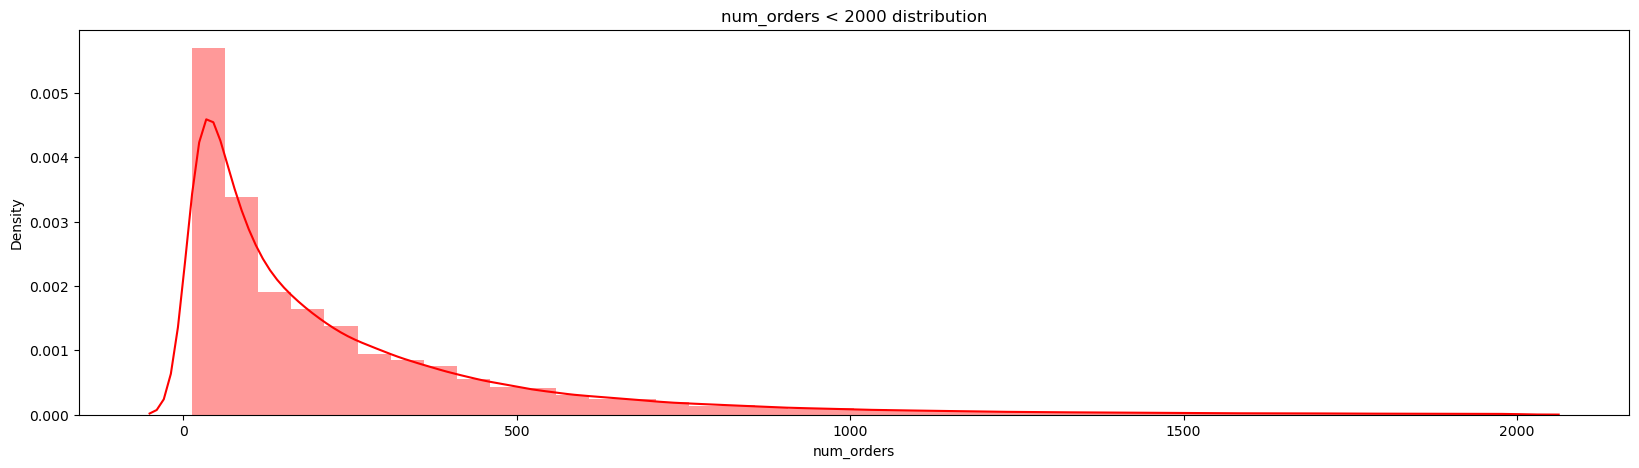

In [85]:
plt.figure(figsize=(20,5))
sns.distplot(train_df.query("num_orders < 2000")['num_orders'], bins=40, kde=True, color='red')
plt.title('num_orders < 2000 distribution')
plt.show()

### Merge the reference data

##### Merge center info

In [88]:
df = pd.merge(train_df, center_info, on="center_id", how="left")
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,2020-01-01,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,2020-01-01,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,2020-01-01,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,2020-01-01,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,2020-01-01,647,56,TYPE_C,2.0


##### Merge meal info

In [90]:
df = pd.merge(df, meal_info, on="meal_id", how="left")
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,2020-01-01,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,2020-01-01,647,56,TYPE_C,2.0,Beverages,Indian


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     456548 non-null  category      
 1   week                   456548 non-null  int64         
 2   center_id              456548 non-null  category      
 3   meal_id                456548 non-null  category      
 4   checkout_price         456548 non-null  float64       
 5   base_price             456548 non-null  float64       
 6   emailer_for_promotion  456548 non-null  int64         
 7   homepage_featured      456548 non-null  int64         
 8   num_orders             456548 non-null  int64         
 9   Date                   456548 non-null  datetime64[ns]
 10  city_code              456548 non-null  category      
 11  region_code            456548 non-null  category      
 12  center_type            456548 non-null  cate

### Univariate Analysis

##### Distribution of orders by categorical columns #####

In [94]:
def catcol_info_dist(col, xticks=45):
    print(pd.DataFrame({col: df[col].value_counts(),
                        "Percentage": 100 * df[col].value_counts() / len(df)}))
    print("--------------------------------------------")
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=xticks)

              category  Percentage
category                          
Beverages       127890   28.012389
Rice Bowl        33408    7.317522
Sandwich         33291    7.291895
Pizza            33138    7.258382
Starters         29941    6.558128
Other Snacks     29379    6.435030
Desert           29294    6.416412
Salad            28559    6.255421
Pasta            27694    6.065956
Seafood          26916    5.895547
Biryani          20614    4.515188
Extras           13562    2.970553
Soup             12675    2.776269
Fish             10187    2.231310
--------------------------------------------


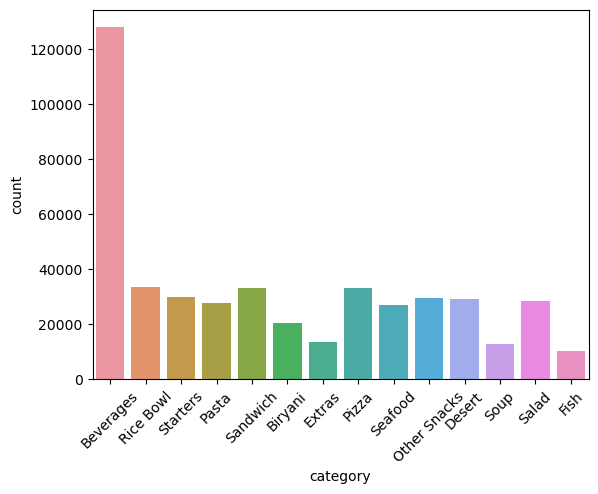

In [95]:
catcol_info_dist('category')

* ***Beverages seem to be the most ordered category by far***
* ***Rest of the categories seem relatively equally ordered except Fish, Soup and Extras which are about 50% of the rest of the categories***

             cuisine  Percentage
cuisine                         
Italian       122925   26.924880
Thai          118216   25.893444
Indian        112612   24.665972
Continental   102795   22.515705
--------------------------------------------


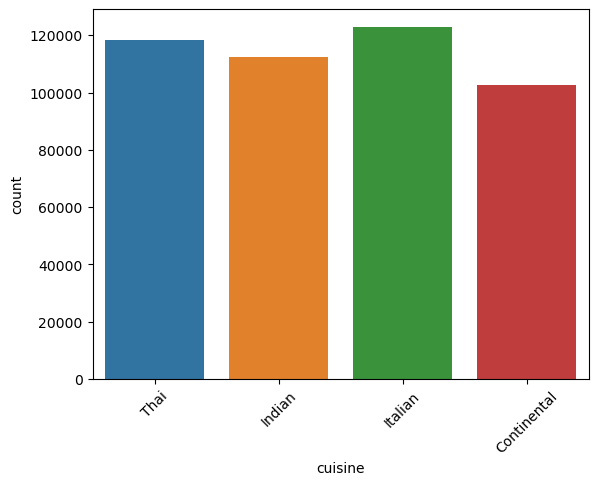

In [97]:
catcol_info_dist('cuisine')        

* ***Orders are fairly evenly distributed by cuisine***

             center_type  Percentage
center_type                         
TYPE_A            262881   57.580145
TYPE_C             99593   21.814355
TYPE_B             94074   20.605500
--------------------------------------------


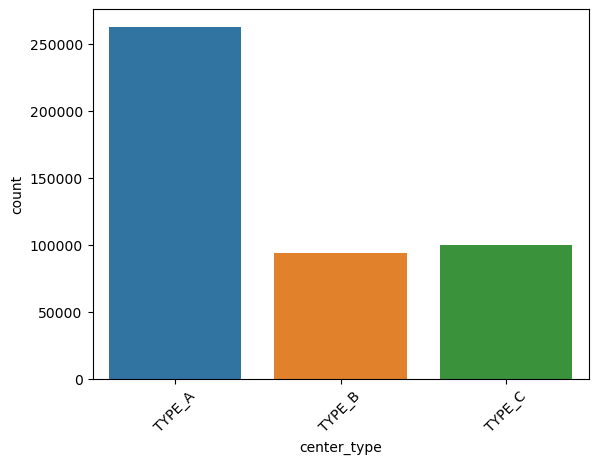

In [99]:
catcol_info_dist('center_type')

* ***TYPE_A centers seem to get the bulk of the orders - almost 2.5 times the other types***

                       emailer_for_promotion  Percentage
emailer_for_promotion                                   
0                                     419498   91.884753
1                                      37050    8.115247
--------------------------------------------


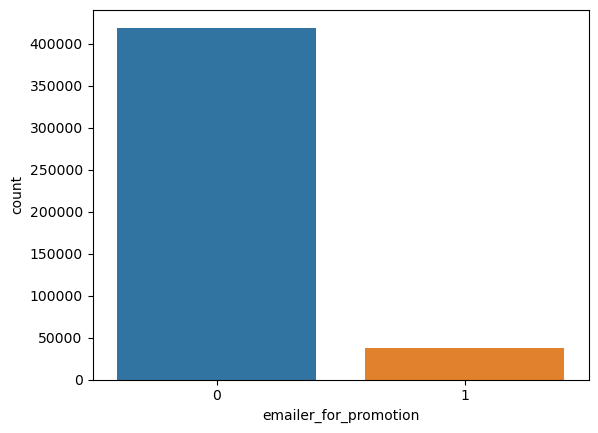

In [101]:
catcol_info_dist('emailer_for_promotion', 0)

                   homepage_featured  Percentage
homepage_featured                               
0                             406693   89.080009
1                              49855   10.919991
--------------------------------------------


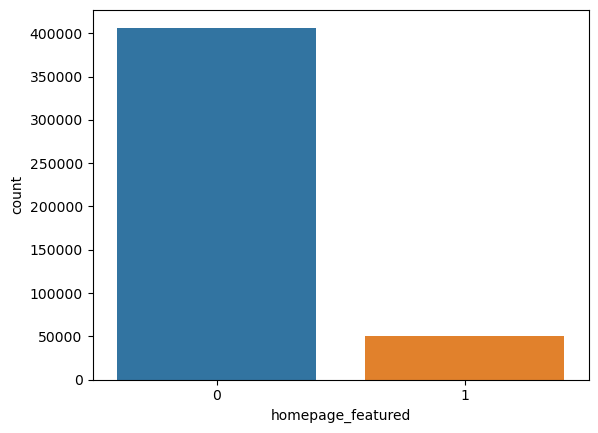

In [102]:
catcol_info_dist('homepage_featured', 0)

         op_area  Percentage
op_area                     
4.0        52548   11.509852
3.9        48533   10.630427
3.8        40080    8.778924
4.4        26060    5.708053
4.5        25688    5.626572
2.8        25503    5.586050
4.1        23346    5.113592
7.0        20686    4.530958
4.8        18648    4.084565
3.4        17258    3.780106
3.6        16821    3.684388
5.1        13366    2.927622
4.2        12608    2.761594
2.7        12430    2.722605
3.0        11184    2.449688
2.0         9512    2.083461
6.7         7046    1.543321
6.3         7015    1.536531
5.6         6993    1.531712
3.7         6801    1.489657
3.5         6666    1.460087
3.2         6333    1.387149
5.0         6164    1.350132
5.3         6053    1.325819
4.6         5983    1.310487
4.7         5975    1.308734
2.4         5021    1.099775
2.9         4712    1.032093
1.9         4083    0.894320
0.9         3432    0.751728
--------------------------------------------


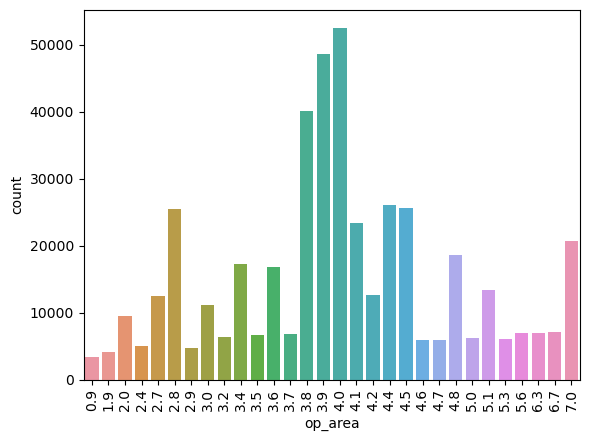

In [103]:
catcol_info_dist('op_area', 90)

### Bivariate Analysis

In [105]:
corr = df.corr(numeric_only=True).round(3)
corr

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area
week,1.000,0.027,0.029,-0.001,-0.008,-0.017,0.002
checkout_price,0.027,1.000,0.953,0.005,-0.057,-0.282,0.022
base_price,0.029,0.953,1.000,0.171,0.057,-0.222,0.018
emailer_for_promotion,-0.001,0.005,0.171,1.000,0.391,0.277,-0.019
homepage_featured,-0.008,-0.057,0.057,0.391,1.000,0.294,0.041
num_orders,-0.017,-0.282,-0.222,0.277,0.294,1.000,0.177
op_area,0.002,0.022,0.018,-0.019,0.041,0.177,1.000


#### Independent variables correlation
* ***`checkout_price` and `base_price` are highly correlated***
* *should consider dropping `base_price` for modeling*
* ***`emailer_for_promotion` and `homepage_featured` also have some positive correlation***
* ***`base_price` seems to have some positive correlation with `emailer_for_promotion`. Perhaps in many cases, the base_price is already high when promotions are being offered?***

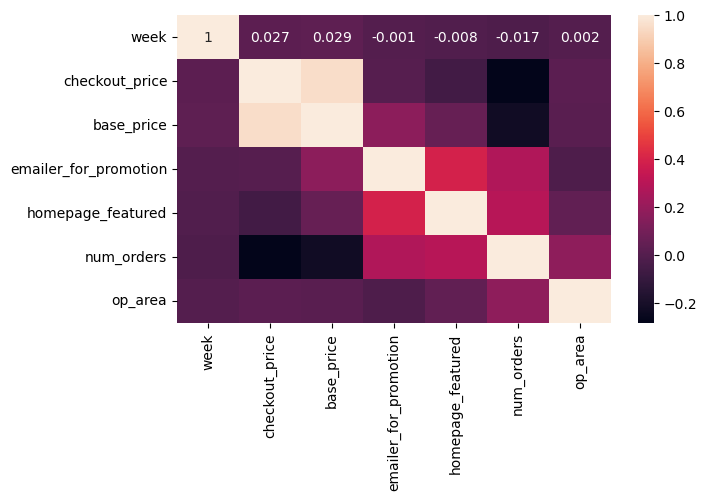

In [107]:
plt.figure(figsize= (7, 4))
sns.heatmap(corr, annot= True);

**Correlation to Target value**

In [109]:
corr[['num_orders']].sort_values('num_orders')

,num_orders
checkout_price,-0.282
base_price,-0.222
week,-0.017
op_area,0.177
emailer_for_promotion,0.277
homepage_featured,0.294
num_orders,1.000


#### Correlation with target variable
* ***Shows good positive correlation with `emailer_for_promotion, homepage_featured, op_area` - as expected***
* ***Shows negative correlation with `checkout_price, base_price`***

#### Let's try to quantify/visualize the correlation of orders to these values,
* `emailer_for_promotion, homepage_featured, op_area, checkout_price`

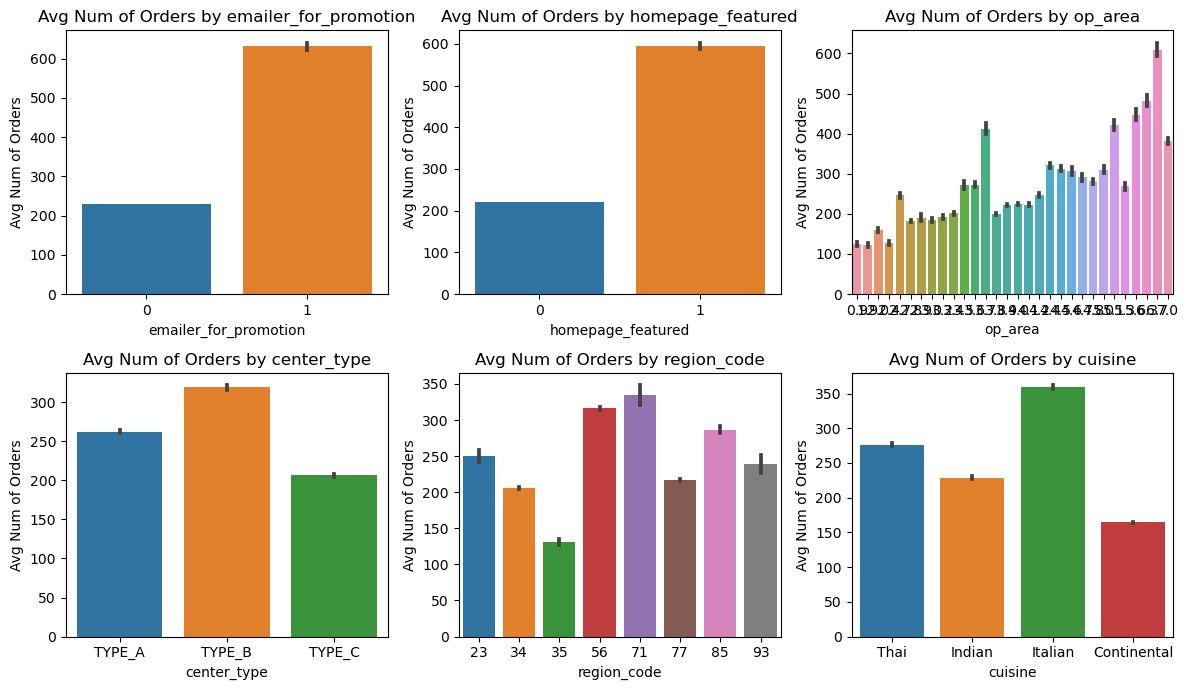

In [112]:
fig, axs = plt.subplots(2, 3, figsize=(12, 7))
cols = ['emailer_for_promotion', 'homepage_featured', 'op_area', 'center_type', 'region_code', 'cuisine']
axes = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

for col, ax_pos in zip(cols, axes):
    ax = axs[ax_pos]
    sns.barplot(x=col, y='num_orders', data=df, estimator=np.mean, ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Avg Num of Orders')
    ax.set_title('Avg Num of Orders by ' + col)
plt.tight_layout()
plt.show()


* ***`homepage_featured, emailer_for_promotion` have a big impact increasing the number of orders***
* ***Italian cuisine seems to be more popular and ordered more than others on average***
* ***`num_orders` seems to have positive correlation with `op_area`***

#### Visualize relationship of `checkout_price` to the target variable
* Add hue of emailer and homepage promos

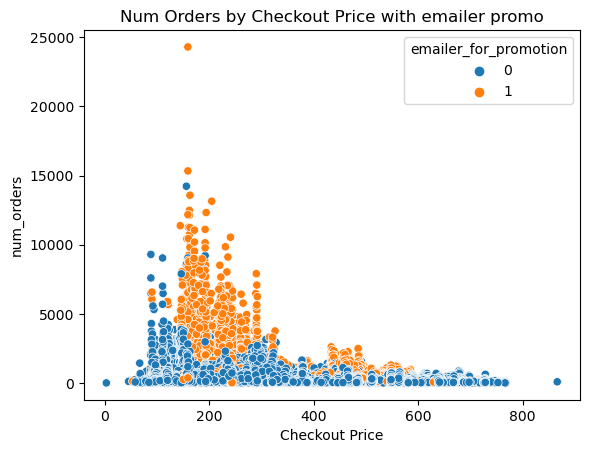

In [115]:
# Create a scatter chart
sns.scatterplot(x='checkout_price', y='num_orders', data=df, hue='emailer_for_promotion')

# Add title and labels
plt.title('Num Orders by Checkout Price with emailer promo')
plt.xlabel('Checkout Price')
plt.ylabel('num_orders')

# Show the chart
plt.show()


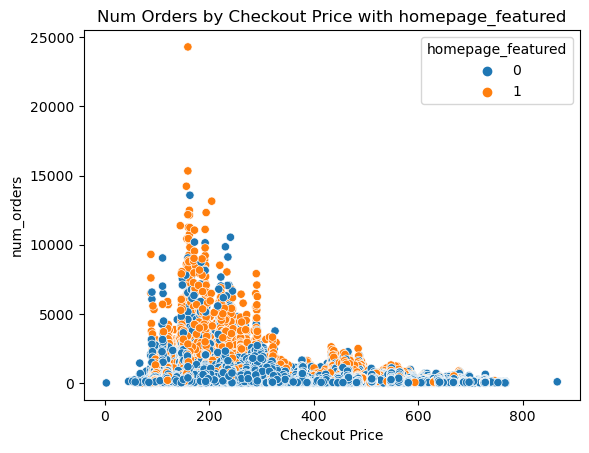

In [116]:
# Create a scatter chart - add hue of homepage_featured
sns.scatterplot(x='checkout_price', y='num_orders', data=df, hue='homepage_featured')

# Add title and labels
plt.title('Num Orders by Checkout Price with homepage_featured')
plt.xlabel('Checkout Price')
plt.ylabel('num_orders')

# Show the chart
plt.show()


* ***`Lower prices` clearly attract more orders***
* ***And `homepage_featured, emailer_for_promotion` also have a big impact in higher number of orders***

##### Visualize relationship of `op_area` and `num_orders`

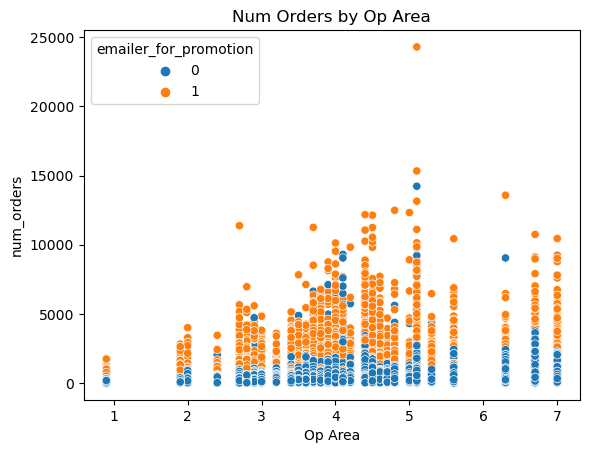

In [119]:
sns.scatterplot(x='op_area', y='num_orders', data=df, hue='emailer_for_promotion')

# Add title and labels
plt.title('Num Orders by Op Area')
plt.xlabel('Op Area')
plt.ylabel('num_orders')

# Show the chart
plt.show()

In [120]:
df['op_area']

0         2.0
1         2.0
2         2.0
3         2.0
4         2.0
         ... 
456543    4.5
456544    4.5
456545    4.5
456546    4.5
456547    4.5
Name: op_area, Length: 456548, dtype: float64

In [121]:
df.groupby('op_area')['num_orders'].mean()

op_area
0.9    123.881119
1.9    121.807005
2.0    159.955950
2.4    126.972117
2.7    246.027353
2.8    182.588637
2.9    190.707343
3.0    184.437411
3.2    192.376283
3.4    201.533492
3.5    271.852235
3.6    273.239165
3.7    411.307161
3.8    199.050998
3.9    221.259040
4.0    224.183566
4.1    222.844213
4.2    247.154029
4.4    321.098734
4.5    313.123015
4.6    306.439412
4.7    291.059582
4.8    280.837731
5.0    309.301590
5.1    422.077959
5.3    269.116802
5.6    446.994852
6.3    481.969779
6.7    609.784984
7.0    380.994344
Name: num_orders, dtype: float64

##### Let's see how average `num_orders` by `op_area` looks

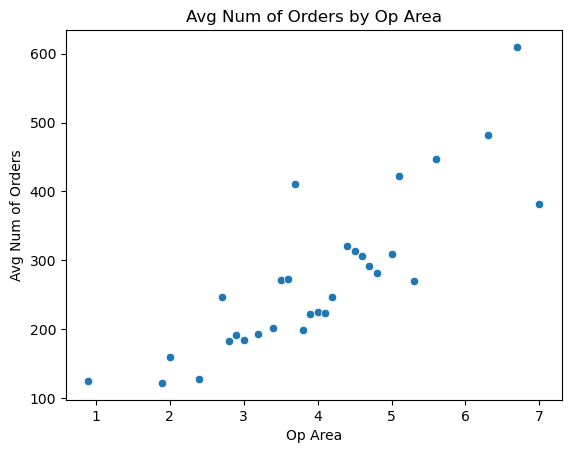

In [123]:
sns.scatterplot(df.groupby('op_area')['num_orders'].mean())
plt.xlabel('Op Area')
plt.ylabel('Avg Num of Orders')
plt.title('Avg Num of Orders by Op Area')
plt.show()

* ***Average number of orders is positively correlated with `op_area`***

* *Note: Since all the features in meal_info will be tied to the meal_id, and all features in center_info will be related to center_id,*
    * *And, predictions are also by week per center and per meal*
    * **all the meal and center feature columns will be constant for any center-meal combo, hence reduces the potential to use those in modeling**

##### Let's check how the order numbers look by the center-meal combo

In [127]:
# Center-Meal groupby
cmdf=df.groupby(['center_id', 'meal_id'])[['num_orders']].sum()
cmdf

num_orders
center_id meal_id            
10        1062         137742
          1109         221685
          1198          50393
          1207          31031
          1216          20940
...                       ...
186       2707          30004
          2760           8513
          2826          38809
          2867           3734
          2956           1458

[3927 rows x 1 columns]

In [128]:
#just a quick check on the number of center-meal combos
len(center_info) * len(meal_info)

3927

In [129]:
#check the center-meal combos with top num_orders
cmdf.sort_values(by='num_orders', ascending=False).head()

num_orders
center_id meal_id            
13        1885         334334
          2290         319676
174       1885         310876
43        2290         308764
13        2707         298925

* ***Above is a good list of top center-meal combos to build and test some models***

### Time Series at overall company level

In [132]:
ts=df.groupby("Date")["num_orders"].sum()

In [133]:
ts.head(2)

Date
2020-01-01    792261
2020-01-08    787084
Name: num_orders, dtype: int64

In [134]:
type(ts)

pandas.core.series.Series

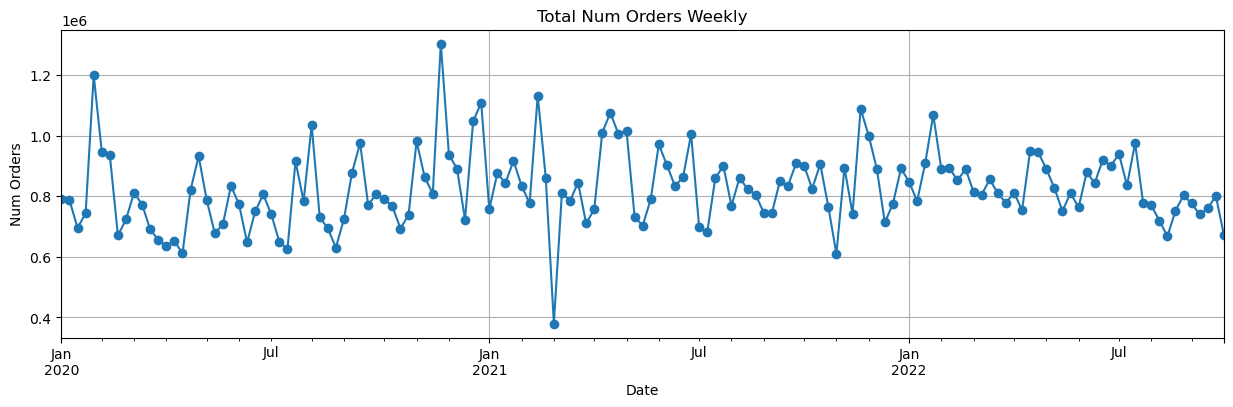

In [135]:
# Plot the num_orders Series
ts.plot(figsize=(15, 4), marker='o')
plt.title('Total Num Orders Weekly')
plt.xlabel('Date')
plt.ylabel('Num Orders')
plt.grid(True)
plt.show()


##### Decompose the Time Series
- `num_orders` at the overall company level

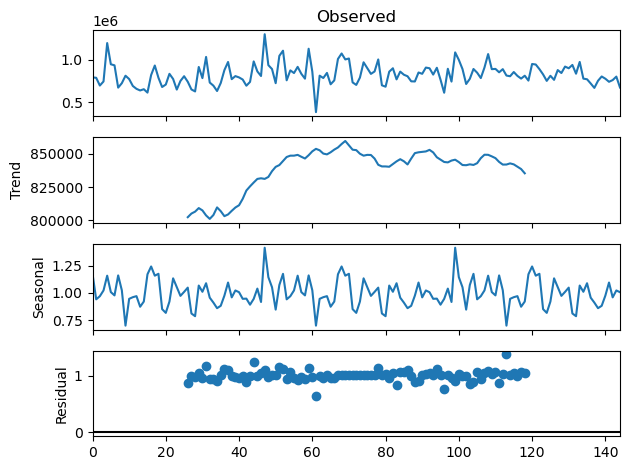

In [137]:
# Visualize Residuals, Seasonal, Trend, and level
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(ts.values, period=52, model="multiplicative")
res.plot()
plt.show()

* *We can see some repeating seasonal pattern*
* *And increasing trend during the 2nd quartile of the 145 week period, but then it plateaud and slightly declined*

#### Create a `revenue` column for analysis purpose

In [140]:
df['revenue'] = df.checkout_price * df.num_orders
df.head(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date,city_code,region_code,center_type,op_area,category,cuisine,revenue
0,1379560,1,55,1885,136.83,152.29,0,0,177,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai,24218.91
1,1466964,1,55,1993,136.83,135.83,0,0,270,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai,36944.10


#### Let's take a look at the revenue over time

In [142]:
ts_rev = df.groupby("Date")["revenue"].sum()
ts_rev.head()

Date
2020-01-01    2.185165e+08
2020-01-08    1.999142e+08
2020-01-15    1.780359e+08
2020-01-22    1.961360e+08
2020-01-29    2.596449e+08
Name: revenue, dtype: float64

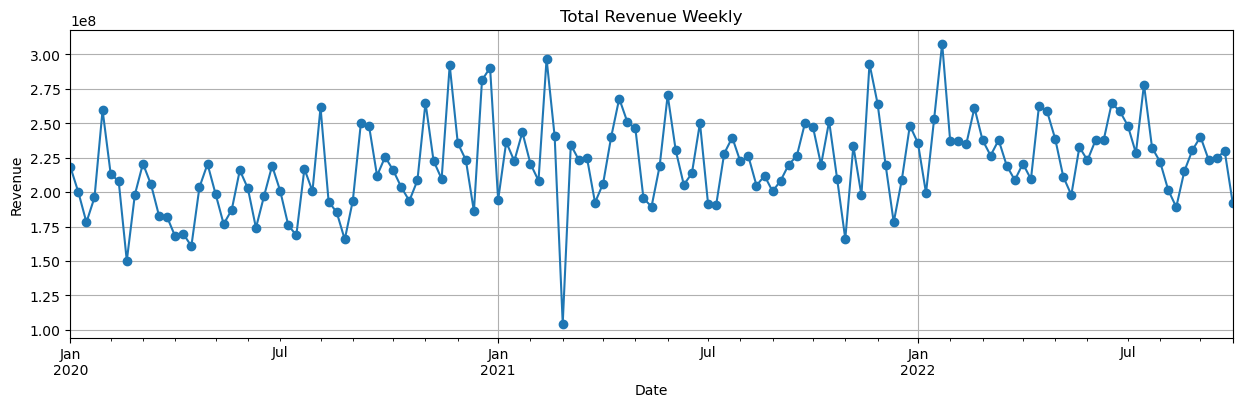

In [143]:
# Plot the revenue Series
ts_rev.plot(figsize=(15, 4), marker='o')
plt.title('Total Revenue Weekly')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


#### Drop Columns
* Drop 'id' column as it is not needed for modeling

In [145]:
df.drop('id', axis=1, inplace=True)
df.head(2)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date,city_code,region_code,center_type,op_area,category,cuisine,revenue
0,1,55,1885,136.83,152.29,0,0,177,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai,24218.91
1,1,55,1993,136.83,135.83,0,0,270,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai,36944.10


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   week                   456548 non-null  int64         
 1   center_id              456548 non-null  category      
 2   meal_id                456548 non-null  category      
 3   checkout_price         456548 non-null  float64       
 4   base_price             456548 non-null  float64       
 5   emailer_for_promotion  456548 non-null  int64         
 6   homepage_featured      456548 non-null  int64         
 7   num_orders             456548 non-null  int64         
 8   Date                   456548 non-null  datetime64[ns]
 9   city_code              456548 non-null  category      
 10  region_code            456548 non-null  category      
 11  center_type            456548 non-null  category      
 12  op_area                456548 non-null  floa

In [147]:
df.head(2)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date,city_code,region_code,center_type,op_area,category,cuisine,revenue
0,1,55,1885,136.83,152.29,0,0,177,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai,24218.91
1,1,55,1993,136.83,135.83,0,0,270,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai,36944.10


### Modeling
#### Let's start with the overall company level summarized data

#### sktime - prepare data: X, y and train/test split

In [150]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import make_reduction
from sktime.utils.plotting import plot_series
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

import time


In [151]:
# set y to the prepared time series data
y = ts

# Create an exogenous dataframe with emailer_for_promotion and homepage_featured avg values per week
X = df.groupby("Date")[['emailer_for_promotion', 'homepage_featured']].mean()
X

,emailer_for_promotion,homepage_featured
Date,,
2020-01-01,0.122177,0.141684
2020-01-08,0.214434,0.177486
2020-01-15,0.035874,0.109003
2020-01-22,0.000000,0.101073
2020-01-29,0.117873,0.162994
...,...,...
2022-09-07,0.070794,0.091940
2022-09-14,0.071340,0.086164
2022-09-21,0.022995,0.066566


In [152]:
# Split data
y_train, y_test = temporal_train_test_split(y, test_size=10)
X_train, X_test = temporal_train_test_split(X, test_size=10)


##### Quick check on the split

In [154]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((135, 2), (10, 2), (135,), (10,))

In [155]:
y_train.tail(2)

Date
2022-07-20    975072
2022-07-27    777106
Name: num_orders, dtype: int64

In [156]:
y_test.head(2)

Date
2022-08-03    769623
2022-08-10    719740
Name: num_orders, dtype: int64

In [157]:
# Forecasting horizon, same as test data
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2022-08-03', '2022-08-10', '2022-08-17', '2022-08-24',
               '2022-08-31', '2022-09-07', '2022-09-14', '2022-09-21',
               '2022-09-28', '2022-10-05'],
              dtype='datetime64[ns]', name='Date', freq=None, is_relative=False)

* ***Let's use MAPE to score the models as it will be a good indicator for our data and goal of accurately forecasting the num_orders***

#### sktime + DummyRegression

In [160]:
# variable to store the results for comparison
results = []
# util method to calculate, store and print eval results
def handle_eval_results(model, y_test, y_pred, exec_time):
    mape = mean_absolute_percentage_error(y_test, y_pred, symmetric=False)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmsle = mean_squared_error(np.log(y_test + 1), np.log(y_pred + 1), squared=False)
    print(f'MAPE: {mape:.4f}, RMSE: {rmse:.4f}, RMSLE: {rmsle:.4f}, Exec Time: {exec_time:.4f} secs')
    results.append({'Model': model, 'MAPE': mape, 'RMSE': rmse, 'RMSLE': rmsle, 'Exec Time': exec_time})


MAPE: 0.1435, RMSE: 113217.7234, RMSLE: 0.1459, Exec Time: 0.0000 secs


(<Figure size 1600x400 with 1 Axes>,
 <Axes: title={'center': 'Overall Aggregate -DummyRegressor'}, xlabel='Date', ylabel='Num orders'>)

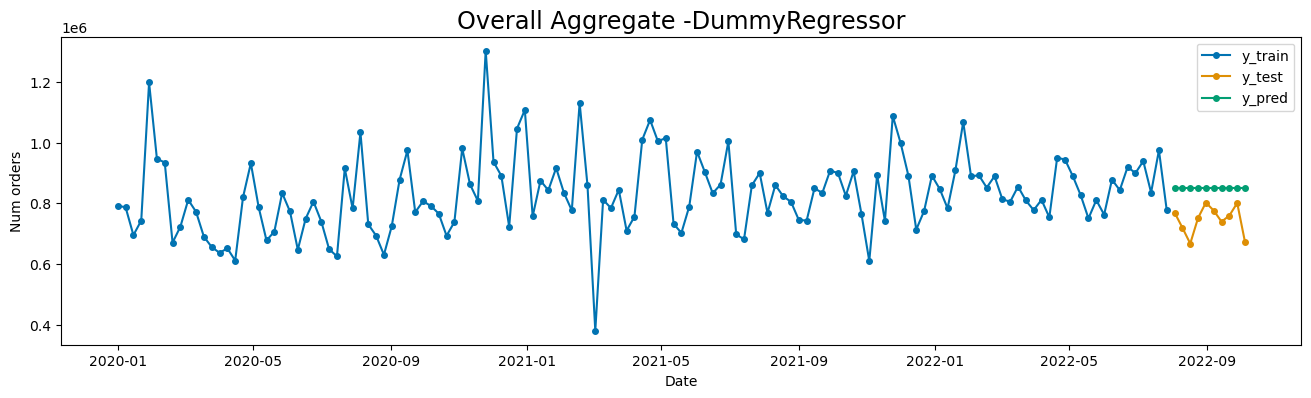

In [161]:
from sklearn.dummy import DummyRegressor

# Dummy regression forecaster
regressor = DummyRegressor()
forecaster = make_reduction(regressor, window_length=52, strategy="recursive")

# Fit and predict
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

# Evaluate
handle_eval_results('DummyRegressor', y_test, y_pred, 0)

# Plot predictions with training and test data
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"], x_label='Date', y_label='Num orders', title='Overall Aggregate -DummyRegressor')


#### sktime + LinearRegression

MAPE: 0.1167, RMSE: 130233.1366, RMSLE: 0.1586, Exec Time: 1.0000 secs


(<Figure size 1600x400 with 1 Axes>,
 <Axes: title={'center': 'Overall Aggregate -LinearRegressor'}, xlabel='Date', ylabel='Num orders'>)

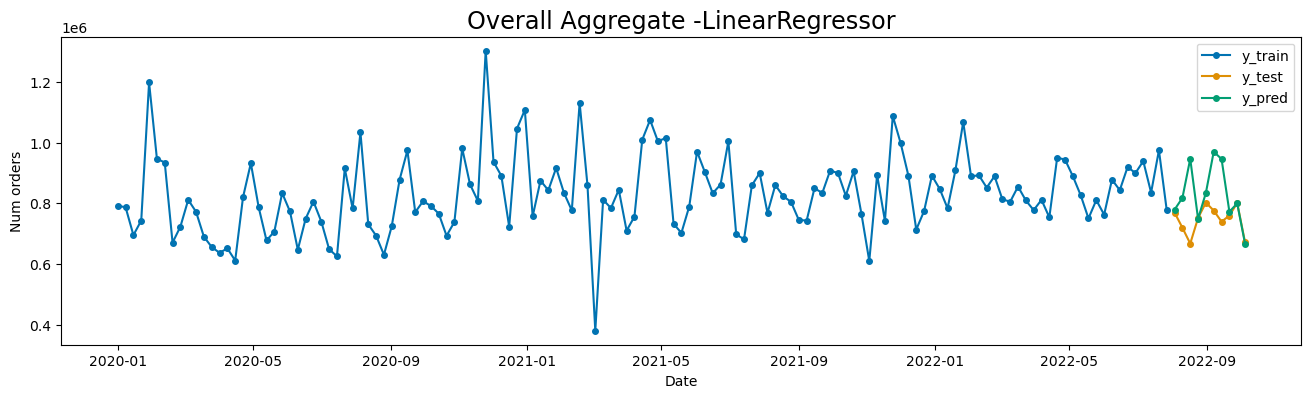

In [163]:
from sklearn.linear_model import LinearRegression

# Linear regression forecaster
regressor = LinearRegression()
forecaster = make_reduction(regressor, window_length=52, strategy="recursive")

# Fit and predict
forecaster.fit(y=y_train, X=X_train)
y_pred = forecaster.predict(fh=fh, X=X_test)

# Evaluate
handle_eval_results('LinearRegression', y_test, y_pred, 1)

# Plot predictions with training and test data
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"], x_label='Date', y_label='Num orders', title='Overall Aggregate -LinearRegressor')

* ***LinearRegression came out with better performance metric than the DummyRegressor***
* Note: adding the exogenous dataframe seems to make a difference

#### sktime + XGBoost

MAPE: 0.1895, RMSE: 155043.3794, RMSLE: 0.1922, Exec Time: 1.0000 secs


(<Figure size 1600x400 with 1 Axes>,
 <Axes: title={'center': 'Overall Aggregate -XGBRegressor'}, xlabel='Date', ylabel='Num orders'>)

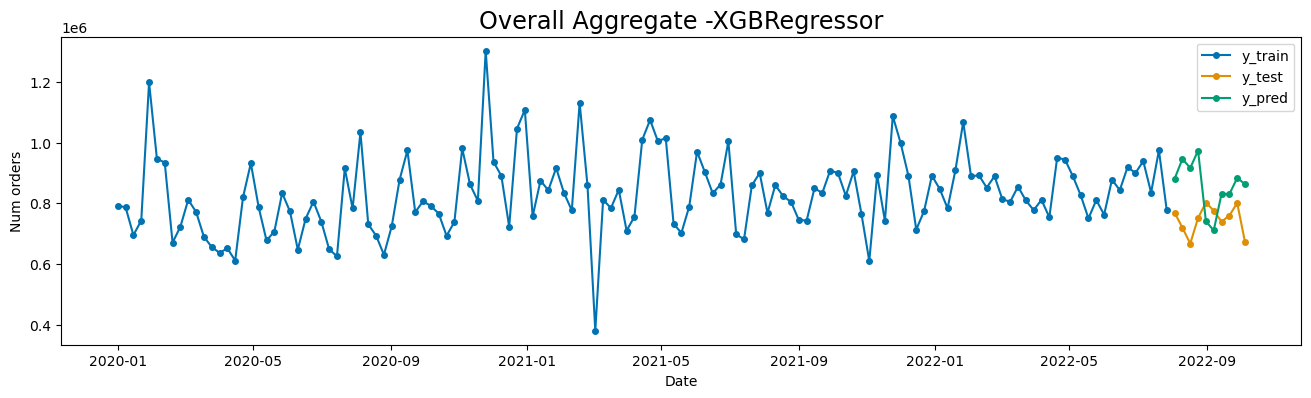

In [166]:
from xgboost import XGBRegressor

# XGBoost forecaster
regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
forecaster = make_reduction(regressor, window_length=52, strategy="recursive")

# Fit and predict
forecaster.fit(y=y_train, X=X_train)
y_pred = forecaster.predict(fh=fh, X=X_test)

# Evaluate
handle_eval_results('XGBRegressor', y_test, y_pred, 1)

# Plot predictions with training and test data
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"], x_label='Date', y_label='Num orders', title='Overall Aggregate -XGBRegressor')


* ***Worse performance than the LinearRegression and even Dummy Regressor***
  

#### Tuning the hyperparameters

In [169]:
from sktime.split import SingleWindowSplitter

validation_size = 10
cv = SingleWindowSplitter(window_length=len(y)-validation_size, fh=validation_size)

In [170]:
cv

SingleWindowSplitter(fh=10, window_length=135)

##### Using Randomized Search

In [172]:
from sktime.forecasting.model_selection import ForecastingRandomizedSearchCV

# XGBoost forecaster with grid of parameters
param_grid = {
    'estimator__max_depth': [10, 20, None],
    'estimator__learning_rate': [0.05, 0.1, 0.2, 0.3],
    'estimator__subsample': np.arange(0.5, 1.0, 0.1),
    'estimator__colsample_bytree': np.arange(0.4, 1.0, 0.1),
    'estimator__colsample_bylevel': np.arange(0.4, 1.0, 0.1),
    'estimator__n_estimators': [100, 500, 1000]
}
regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
forecaster = make_reduction(regressor, window_length=52, strategy="recursive")
gscv = ForecastingRandomizedSearchCV(forecaster, cv=cv, param_distributions=param_grid, n_iter=100, random_state=42)
gscv

ForecastingRandomizedSearchCV(cv=SingleWindowSplitter(fh=10, window_length=135),
                              forecaster=RecursiveTabularRegressionForecaster(estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_...
                              n_iter=100,
                              param_distributions={'estimator__colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                                   'estimator__colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                                   'estimator__learning_rate': [0.05,
                                                                                0.1,
                                                                                0.2,
                                                                                0.3],
                                                   'estimator__max_depth': [10,
                                                                            20,
                                                                            None],
                                                   'estimator__n_estimators': [100,
                                                                               500,
                                                                               1000],
                                                   'estimator__subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                              random_state=42)

Time taken: 72.26 seconds
MAPE: 0.1471, RMSE: 121734.9449, RMSLE: 0.1548, Exec Time: 72.2626 secs


(<Figure size 1600x400 with 1 Axes>,
 <Axes: title={'center': 'Overall Aggregate -XGBRegressor with RandomizedSearchCV'}, xlabel='Date', ylabel='Num orders'>)

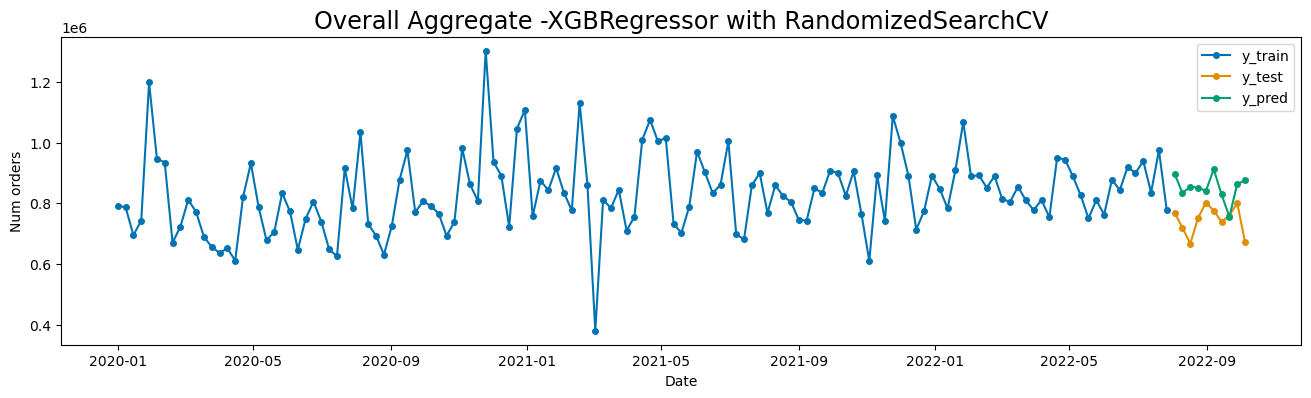

In [173]:
# Fit and predict
start = time.time()

gscv.fit(y=y_train, X=X_train)
y_pred = gscv.predict(fh=fh, X=X_test)

time_taken = time.time() - start
print(f"Time taken: {time_taken:.2f} seconds")

# Evaluate
handle_eval_results('XGBRegressor (RSCV tuned)', y_test, y_pred, time_taken)

# Plot predictions with training and test data
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"], x_label='Date', y_label='Num orders', title='Overall Aggregate -XGBRegressor with RandomizedSearchCV')


In [174]:
gscv.best_params_

{'estimator__subsample': 0.7,
 'estimator__n_estimators': 1000,
 'estimator__max_depth': 10,
 'estimator__learning_rate': 0.2,
 'estimator__colsample_bytree': 0.5,
 'estimator__colsample_bylevel': 0.7999999999999999}

##### RandomForest model for Overall Aggregate Level


Time taken: 16.91 seconds
MAPE: 0.1388, RMSE: 122989.3392, RMSLE: 0.1565, Exec Time: 16.9138 secs


(<Figure size 1600x400 with 1 Axes>,
 <Axes: title={'center': 'Overall Aggregate -RandomForestRegressor with RandomizedSearchCV'}, xlabel='Date', ylabel='Num orders'>)

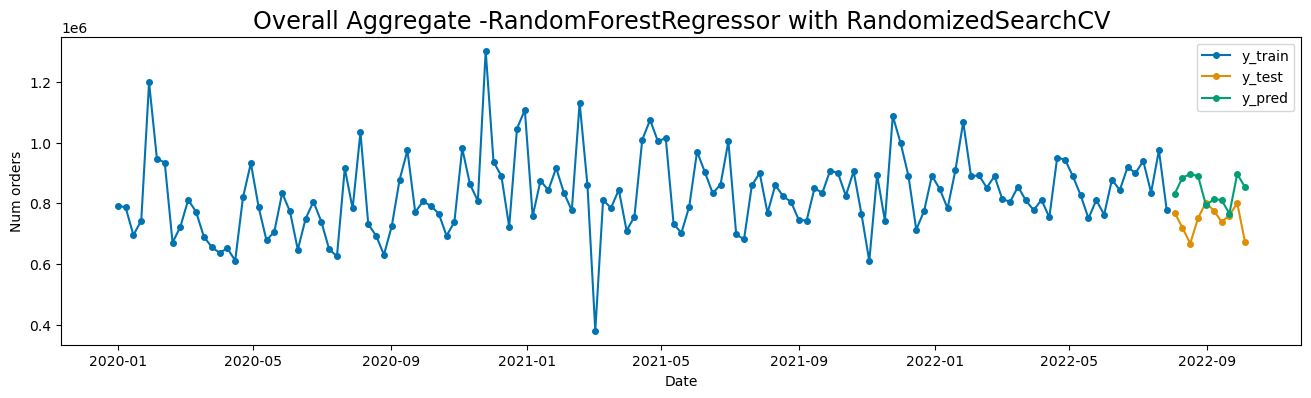

In [176]:
from sklearn.ensemble import RandomForestRegressor

cv = SingleWindowSplitter(window_length=len(y)-validation_size, fh=validation_size)

# RandomForest forecaster with grid of parameters
param_grid = {
    'estimator__max_depth': [5, 10, 15, None],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__n_estimators': [10, 20, 50, 80]
}

regressor = RandomForestRegressor(criterion='squared_error', random_state=42)
forecaster = make_reduction(regressor, window_length=52, strategy="recursive")
gscv = ForecastingRandomizedSearchCV(forecaster, cv=cv, param_distributions=param_grid, n_iter=100, random_state=42)

# Fit and predict
start = time.time()

gscv.fit(y=y_train, X=X_train)
y_pred = gscv.predict(fh=fh, X=X_test)

time_taken = time.time() - start
print(f"Time taken: {time_taken:.2f} seconds")

# Evaluate
handle_eval_results('RandomForestRegressor (RSCV tuned)', y_test, y_pred, time_taken)

# Plot predictions with training and test data
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"], x_label='Date', y_label='Num orders', title='Overall Aggregate -RandomForestRegressor with RandomizedSearchCV')


In [177]:
gscv.best_params_

{'estimator__n_estimators': 20,
 'estimator__min_samples_split': 5,
 'estimator__min_samples_leaf': 2,
 'estimator__max_depth': None}

In [178]:
# Save results
overall_results = results

In [179]:
overall_results_df = pd.DataFrame(overall_results).round(4)
overall_results_df

,Model,MAPE,RMSE,RMSLE,Exec Time
0,DummyRegressor,0.1435,113217.7234,0.1459,0.0000
1,LinearRegression,0.1167,130233.1366,0.1586,1.0000
2,XGBRegressor,0.1895,155043.3794,0.1922,1.0000
3,XGBRegressor (RSCV tuned),0.1471,121734.9449,0.1548,72.2626
4,RandomForestRegressor (RSCV tuned),0.1388,122989.3392,0.1565,16.9138


### Model - for the top center-meal combo
- *This will enable us to use all the features available*

*Bringing this center-meal summary data down here for reference*

In [182]:
#check the center-meal combos with top num_orders
cmdf.sort_values(by='num_orders', ascending=False).head()

num_orders
center_id meal_id            
13        1885         334334
          2290         319676
174       1885         310876
43        2290         308764
13        2707         298925

**Check what type of meals are the above meal ids referring to**

In [184]:
meal_info.query("meal_id in [1885, 2290, 2707]")

,meal_id,category,cuisine
0,1885,Beverages,Thai
10,2707,Beverages,Italian
17,2290,Rice Bowl,Indian


#### Model for `center_id` = 13 and `meal_id` = 1885

In [186]:
df_cm1 = df.query("(center_id == 13) & (meal_id == 1885)")
df_cm1.sample(5)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date,city_code,region_code,center_type,op_area,category,cuisine,revenue
78370,28,13,1885,122.28,163.96,0,0,1432,2020-07-08,590,56,TYPE_B,6.7,Beverages,Thai,175104.96
8905,4,13,1885,134.86,122.28,0,1,2472,2020-01-22,590,56,TYPE_B,6.7,Beverages,Thai,333373.92
387882,125,13,1885,150.38,149.38,0,1,3659,2022-05-18,590,56,TYPE_B,6.7,Beverages,Thai,550240.42
111767,39,13,1885,142.59,164.96,0,1,2781,2020-09-23,590,56,TYPE_B,6.7,Beverages,Thai,396542.79
117877,41,13,1885,143.59,163.96,0,1,2753,2020-10-07,590,56,TYPE_B,6.7,Beverages,Thai,395303.27


In [187]:
df_cm1.shape

(145, 16)

In [188]:
df_cm1.set_index('Date', inplace=True)
df_cm1.head(2)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,revenue
Date,,,,,,,,,,,,,,,
2020-01-01,1,13,1885,135.86,122.28,0,1,2132,590,56,TYPE_B,6.7,Beverages,Thai,289653.52
2020-01-08,2,13,1885,135.86,121.28,0,1,1891,590,56,TYPE_B,6.7,Beverages,Thai,256911.26


#### Prep data: X, y and train/test split

In [190]:
y = df_cm1['num_orders']

# Create an exogenous dataframe with all relevant features from the df
X = df_cm1[['checkout_price', 'emailer_for_promotion', 'homepage_featured']]
X

,checkout_price,emailer_for_promotion,homepage_featured
Date,,,
2020-01-01,135.86,0,1
2020-01-08,135.86,0,1
2020-01-15,133.86,0,1
2020-01-22,134.86,0,1
2020-01-29,143.56,0,1
...,...,...,...
2022-09-07,151.38,0,1
2022-09-14,151.38,0,1
2022-09-21,150.41,0,1


In [191]:
# Split data
y_train, y_test = temporal_train_test_split(y, test_size=10)
X_train, X_test = temporal_train_test_split(X, test_size=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((135, 3), (10, 3), (135,), (10,))

In [192]:
# Scale `checkout_price` - we exclude base_price because of the strong correlation with checkout_price
from sklearn.preprocessing import StandardScaler

to_be_scaled_cols = ['checkout_price']
scaler = StandardScaler()
X_train[to_be_scaled_cols] = scaler.fit_transform(X_train[to_be_scaled_cols])
X_test[to_be_scaled_cols] = scaler.transform(X_test[to_be_scaled_cols])
X_train.head()

,checkout_price,emailer_for_promotion,homepage_featured
Date,,,
2020-01-01,-0.938536,0,1
2020-01-08,-0.938536,0,1
2020-01-15,-1.174040,0,1
2020-01-22,-1.056288,0,1
2020-01-29,-0.031845,0,1


In [193]:
# Forecasting horizon, same as test data
fh = ForecastingHorizon(y_test.index, is_relative=False)


In [194]:
#reset results to store the new results
results = []

##### DummyRegressor model for `center_id = 13, meal_id = 1885` - *as baseline*

MAPE: 0.1237, RMSE: 532.3073, RMSLE: 0.1877, Exec Time: 0.0000 secs


(<Figure size 1600x400 with 1 Axes>,
 <Axes: title={'center': 'center_id=13,meal_id=1885 -DummyRegressor'}, xlabel='Date', ylabel='Num orders'>)

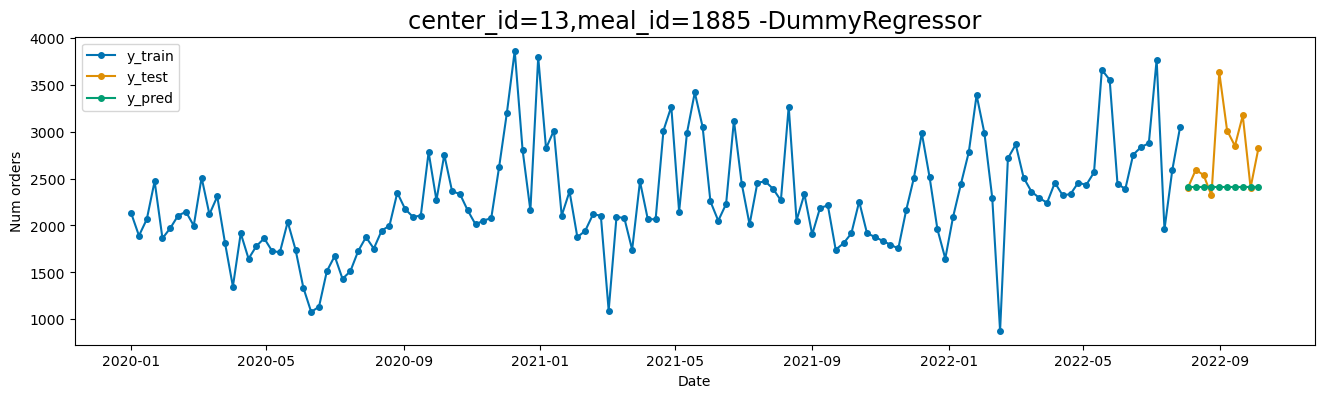

In [196]:
# Dummy regression forecaster
regressor = DummyRegressor()
forecaster = make_reduction(regressor, window_length=52, strategy="recursive")

# Fit and predict
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

# Evaluate
handle_eval_results('DummyRegressor', y_test, y_pred, 0)

# Plot predictions with training and test data
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"], x_label='Date', y_label='Num orders', title='center_id=13,meal_id=1885 -DummyRegressor')


##### LinearRegression model for `center_id = 13, meal_id = 1885`

MAPE: 0.3750, RMSE: 1157.7575, RMSLE: 0.4318, Exec Time: 16.9138 secs


(<Figure size 1600x400 with 1 Axes>,
 <Axes: title={'center': 'center_id=13, meal_id=1885 -LinearRegressor'}, xlabel='Date', ylabel='Num orders'>)

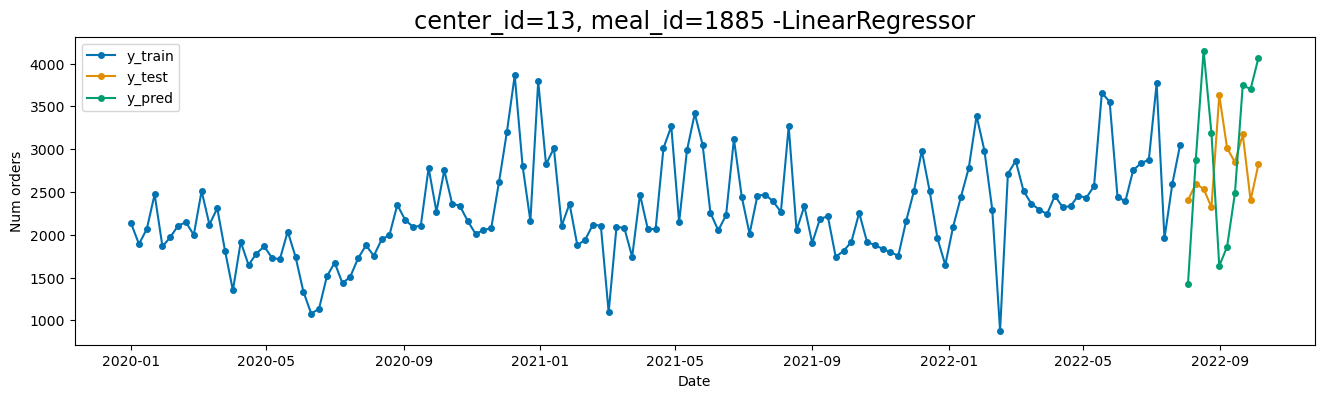

In [198]:
# Linear regression forecaster
regressor = LinearRegression()
forecaster = make_reduction(regressor, window_length=52, strategy="recursive")

# Fit and predict
forecaster.fit(y=y_train, X=X_train)
y_pred = forecaster.predict(fh=fh, X=X_test)

# Evaluate
handle_eval_results('LinearRegression', y_test, y_pred, time_taken)

# Plot predictions with training and test data
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"], x_label='Date', y_label='Num orders', title='center_id=13, meal_id=1885 -LinearRegressor')

##### XGBoost model for `center_id = 13, meal_id = 1885`

MAPE: 0.1013, RMSE: 451.7821, RMSLE: 0.1573, Exec Time: 21.7523 secs


(<Figure size 1600x400 with 1 Axes>,
 <Axes: title={'center': 'center=13 & meal=1885 -XGBRegressor with RandomizedSearchCV'}, xlabel='Date', ylabel='Num orders'>)

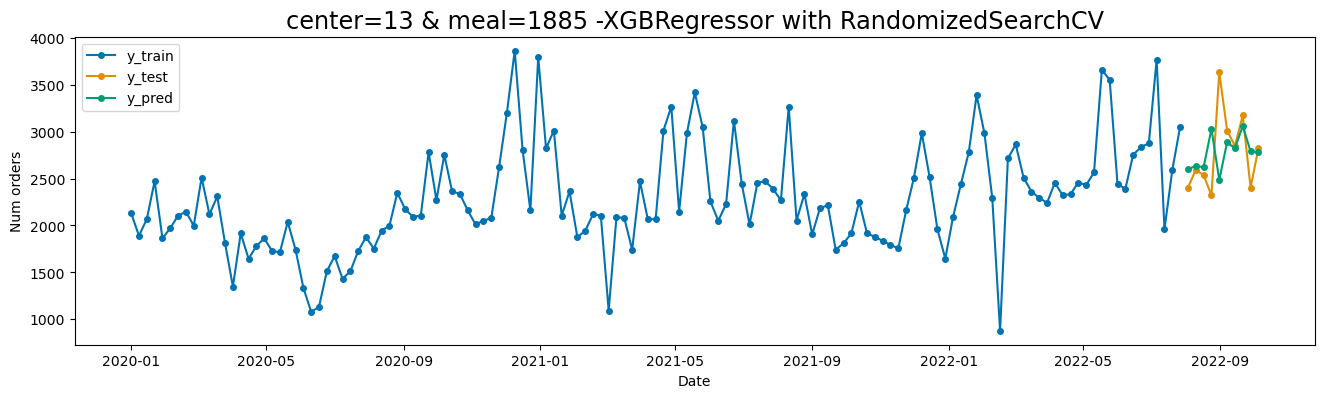

In [200]:
cv = SingleWindowSplitter(window_length=len(y)-validation_size, fh=validation_size)

# XGBoost forecaster with grid of parameters
param_grid = {
    'estimator__max_depth': [3, 6, 12, 20],
    'estimator__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'estimator__subsample': np.arange(0.5, 1.0, 0.1),
    'estimator__colsample_bytree': np.arange(0.4, 1.0, 0.1),
    'estimator__colsample_bylevel': np.arange(0.4, 1.0, 0.1),
    'estimator__n_estimators': [100, 500, 1000]
}
regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
forecaster = make_reduction(regressor, window_length=52, strategy="recursive")
gscv = ForecastingRandomizedSearchCV(forecaster, cv=cv, param_distributions=param_grid, n_iter=100, random_state=42)

# Fit and predict
start = time.time()

gscv.fit(y=y_train, X=X_train)
y_pred = gscv.predict(fh=fh, X=X_test)

time_taken = time.time() - start

# Evaluate
handle_eval_results('XGBRegressor (RSCV tuned)', y_test, y_pred, time_taken)

# Plot predictions with training and test data
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"], x_label='Date', y_label='Num orders', title='center=13 & meal=1885 -XGBRegressor with RandomizedSearchCV')


In [201]:
gscv.best_params_

{'estimator__subsample': 0.7,
 'estimator__n_estimators': 100,
 'estimator__max_depth': 12,
 'estimator__learning_rate': 0.3,
 'estimator__colsample_bytree': 0.8999999999999999,
 'estimator__colsample_bylevel': 0.6}

##### RandomForest model for `center_id = 13, meal_id = 1885`


MAPE: 0.0939, RMSE: 475.8379, RMSLE: 0.1657, Exec Time: 12.8916 secs


(<Figure size 1600x400 with 1 Axes>,
 <Axes: title={'center': 'center=13 & meal=1885 -RandomForestRegressor with RandomizedSearchCV'}, xlabel='Date', ylabel='Num orders'>)

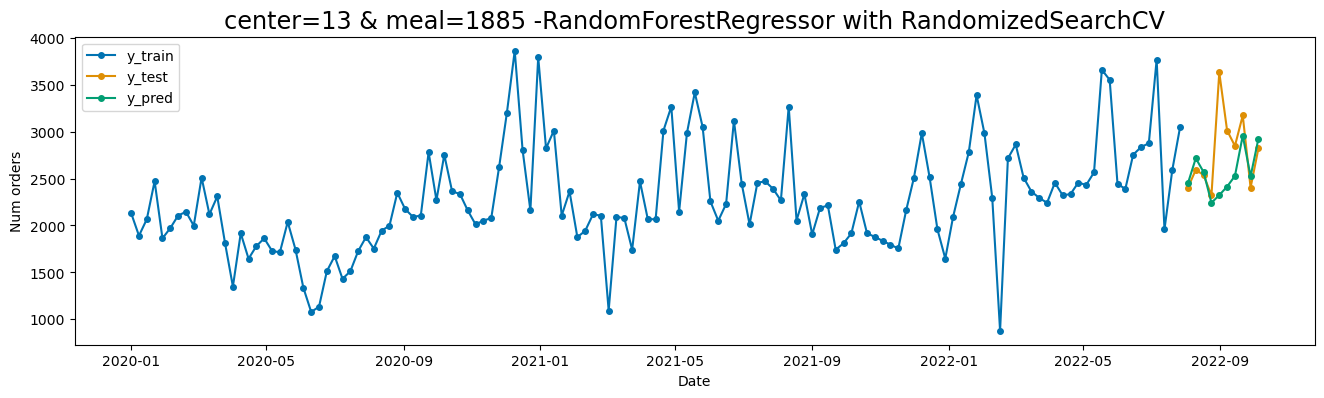

In [203]:
cv = SingleWindowSplitter(window_length=len(y)-validation_size, fh=validation_size)

# RandomForest forecaster with grid of parameters
param_grid = {
    'estimator__max_depth': [5, 10, 15, 20],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__n_estimators': [10, 20, 50, 100]
}

regressor = RandomForestRegressor(criterion='squared_error', random_state=42)
forecaster = make_reduction(regressor, window_length=52, strategy="recursive")
gscv = ForecastingRandomizedSearchCV(forecaster, cv=cv, param_distributions=param_grid, n_iter=100, random_state=42)

# Fit and predict
start = time.time()

gscv.fit(y=y_train, X=X_train)
y_pred = gscv.predict(fh=fh, X=X_test)

time_taken = time.time() - start

# Evaluate
handle_eval_results('RandomForestRegressor (RSCV tuned)', y_test, y_pred, time_taken)

# Plot predictions with training and test data
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"], x_label='Date', y_label='Num orders', title='center=13 & meal=1885 -RandomForestRegressor with RandomizedSearchCV')


In [204]:
gscv.best_params_

{'estimator__n_estimators': 10,
 'estimator__min_samples_split': 10,
 'estimator__min_samples_leaf': 2,
 'estimator__max_depth': 10}

In [205]:
center_meal_results = results

In [206]:
cmresults_df = pd.DataFrame(center_meal_results).round(4)
cmresults_df

,Model,MAPE,RMSE,RMSLE,Exec Time
0,DummyRegressor,0.1237,532.3073,0.1877,0.0000
1,LinearRegression,0.3750,1157.7575,0.4318,16.9138
2,XGBRegressor (RSCV tuned),0.1013,451.7821,0.1573,21.7523
3,RandomForestRegressor (RSCV tuned),0.0939,475.8379,0.1657,12.8916
